In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score

In [42]:
# Load dataset
df = pd.read_csv("vehicle.csv")  # Replace with your file path if needed

In [44]:
# Clean column names
df.columns = df.columns.str.strip().str.replace("'", "").str.replace(" ", "_")


In [46]:
# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

In [48]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Create linkage matrix for dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

In [52]:
# Apply Agglomerative Clustering with 4 clusters
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = agg_cluster.fit_predict(X_scaled)

In [54]:
# Count of each cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

In [56]:
# Count of each actual class
class_counts = y.value_counts()

In [58]:
# Compare clusters with actual labels
ari_score = adjusted_rand_score(y, cluster_labels)

In [60]:
# Print results
print("Cluster Counts:\n", cluster_counts)
print("\nActual Class Counts:\n", class_counts)
print(f"\nAdjusted Rand Index (ARI): {ari_score:.4f}")

Cluster Counts:
 0    317
1    257
2    264
3      8
Name: count, dtype: int64

Actual Class Counts:
 Class
bus     218
saab    217
opel    212
van     199
Name: count, dtype: int64

Adjusted Rand Index (ARI): 0.0921


In [64]:
# Check if the original dataset and the scaled dataset are the same
if np.allclose(X.values, X_scaled):
    print("Yes, the dataset is the same.")
else:
    print("No, the dataset is different.")

No, the dataset is different.


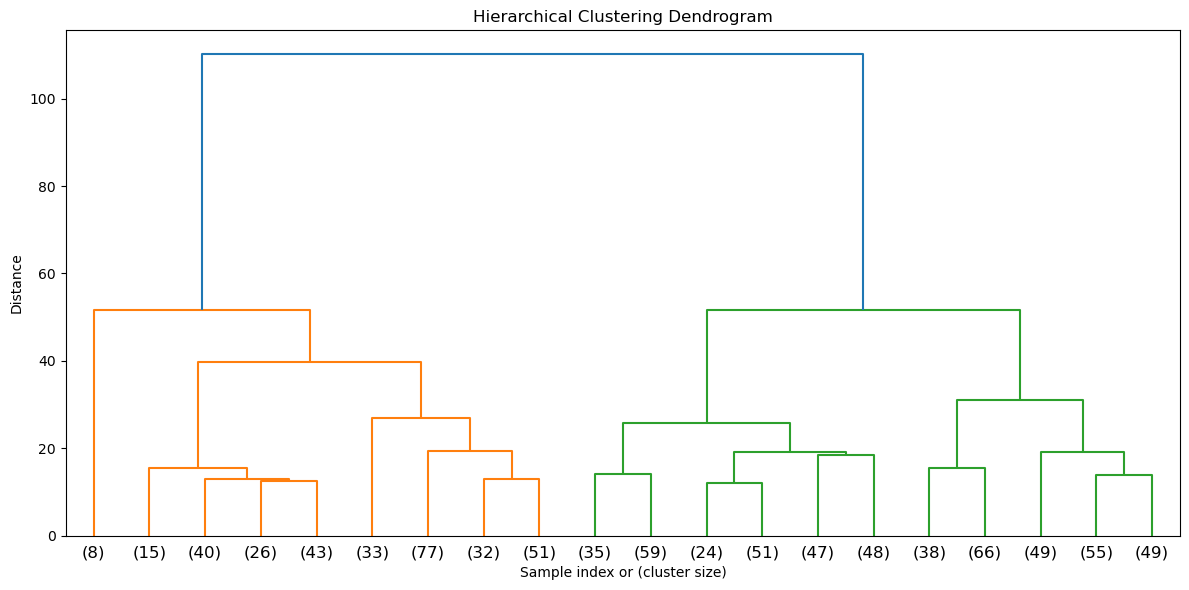

In [29]:
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode="lastp", p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()